# Load Dataset

In [4]:
import pandas as pd

In [5]:
train=pd.read_csv("C:/Users/shaik/Downloads/training_set (1).csv")
test=pd.read_csv("C:/Users/shaik/Downloads/testing_set (3).csv")

# Missing Data treatment

In [6]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

from PM4 import replacer
replacer(train)

In [8]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

from PM4 import replacer
replacer(test)

In [9]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [10]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500


# EDA

In [12]:
Y = train[["SalePrice"]]
X = train.drop(labels=["SalePrice","Id"],axis=1)

from PM8n import ANOVA,chisquare
train.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


In [13]:
for i in train.columns:
    if(train[i].dtypes == "object"):
        print("SalePrice vs",i,": --> ",ANOVA(train,i,"SalePrice"))

SalePrice vs MSZoning : -->  0.0
SalePrice vs Street : -->  0.117
SalePrice vs Alley : -->  0.0
SalePrice vs LotShape : -->  0.0
SalePrice vs LandContour : -->  0.0
SalePrice vs Utilities : -->  0.585
SalePrice vs LotConfig : -->  0.0
SalePrice vs LandSlope : -->  0.141
SalePrice vs Neighborhood : -->  0.0
SalePrice vs Condition1 : -->  0.0
SalePrice vs Condition2 : -->  0.043
SalePrice vs BldgType : -->  0.0
SalePrice vs HouseStyle : -->  0.0
SalePrice vs RoofStyle : -->  0.0
SalePrice vs RoofMatl : -->  0.0
SalePrice vs Exterior1st : -->  0.0
SalePrice vs Exterior2nd : -->  0.0
SalePrice vs MasVnrType : -->  0.0
SalePrice vs ExterQual : -->  0.0
SalePrice vs ExterCond : -->  0.0
SalePrice vs Foundation : -->  0.0
SalePrice vs BsmtQual : -->  0.0
SalePrice vs BsmtCond : -->  0.0
SalePrice vs BsmtExposure : -->  0.0
SalePrice vs BsmtFinType1 : -->  0.0
SalePrice vs BsmtFinType2 : -->  0.0
SalePrice vs Heating : -->  0.001
SalePrice vs HeatingQC : -->  0.0
SalePrice vs CentralAir : --> 

In [14]:
X = X.drop(labels=["Utilities","Street"],axis=1)

# Preprocessing

In [45]:
from PM8n import preprocessing
Xnew = preprocessing(X)

# Split Data into train and test

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Model OLS

In [47]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()

In [48]:
prev_rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().tail(1).index[0]
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xval,ytrain,yval = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
curr_rsq = model.rsquared_adj
print("Previous:",round(prev_rsq,5),"\tCurrent:",round(curr_rsq,5),"\t",col_to_drop)

Previous: 0.93323 	Current: 0.93323 	 ExterCond_Ex


# Check for overfitting

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xval)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(yval,pred_ts)

In [56]:
tr_err

12422.141267123288

In [57]:
ts_err

9798527225961.623

# Regularize

In [58]:
from sklearn.linear_model import Ridge

def reg(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xval)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,pred_tr)
    ts_err = mean_absolute_error(yval,pred_ts)
    print("Training Error:",tr_err)
    print("Validation Error:",ts_err)
    print("-------------------------")
    return ts_err

In [59]:
W = []
e = 0.0
for i in range(0,1000):
    W.append(round(e,3))
    e = e + 0.001

In [60]:
err = []
for i in W:
    rr = Ridge(alpha=i)
    print("----------","Alpha",i,"---------")
    trerr = reg(rr)
    err.append(trerr)

---------- Alpha 0.0 ---------
Training Error: 14556.482020547945
Validation Error: 2.3640894815840924e+16
-------------------------
---------- Alpha 0.001 ---------
Training Error: 12418.342264258952
Validation Error: 18287.557085194803
-------------------------
---------- Alpha 0.002 ---------
Training Error: 12418.665614386437
Validation Error: 18286.07981373709
-------------------------
---------- Alpha 0.003 ---------
Training Error: 12419.032364611932
Validation Error: 18284.60764587548
-------------------------
---------- Alpha 0.004 ---------
Training Error: 12419.393171924812
Validation Error: 18283.140507995
-------------------------
---------- Alpha 0.005 ---------
Training Error: 12419.740021264448
Validation Error: 18281.67830943631
-------------------------
---------- Alpha 0.006 ---------
Training Error: 12420.175153345963
Validation Error: 18280.220948290207
-------------------------
---------- Alpha 0.007 ---------
Training Error: 12420.595850791025
Validation Error: 1

In [61]:
err

[2.3640894815840924e+16,
 18287.557085194803,
 18286.07981373709,
 18284.60764587548,
 18283.140507995,
 18281.67830943631,
 18280.220948290207,
 18278.768315721136,
 18277.320299256495,
 18275.876785217744,
 18274.437660532665,
 18273.002814048825,
 18271.95374575786,
 18270.935561565348,
 18269.917119058406,
 18268.898483320547,
 18267.879710715148,
 18266.860850369183,
 18265.841945403336,
 18264.82303394443,
 18263.804149968844,
 18262.785323997803,
 18261.766583678793,
 18260.747954266528,
 18259.72945902221,
 18258.711119545893,
 18257.938798469608,
 18257.18375609436,
 18256.426858934632,
 18255.80495415898,
 18255.30251292113,
 18254.796355392693,
 18254.28657475211,
 18253.77326030224,
 18253.256497775586,
 18252.73636960367,
 18252.21295516006,
 18251.6863309752,
 18251.156570932704,
 18250.623746443514,
 18250.13613853228,
 18249.691494604005,
 18249.243277925198,
 18248.791565686784,
 18248.33643272187,
 18247.877951632916,
 18247.548935211642,
 18247.292995741,
 18247.0326

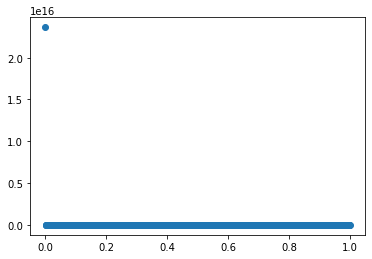

In [62]:
import matplotlib.pyplot as plt
plt.scatter(W,err)

# Train the selected regularized model

In [63]:
rr = Ridge(alpha=0.077)
model = rr.fit(Xnew,Y)

In [64]:
Xnew.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=297)

# Prepare test data

In [65]:
xtest = preprocessing(test)

In [66]:
xtest[Xnew.columns]

KeyError: "['RoofMatl_Roll', 'GarageQual_Ex', 'PoolQC_Fa', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'Condition2_RRAe', 'Exterior1st_ImStucc', 'Condition2_RRAn', 'MiscFeature_TenC', 'Exterior2nd_Other', 'RoofMatl_ClyTile', 'Condition2_RRNn', 'Heating_Floor', 'RoofMatl_Membran', 'Exterior1st_Stone', 'Heating_OthW', 'Electrical_Mix'] not in index"

In [ ]:
r = ['RoofMatl_Roll', 'GarageQual_Ex', 'PoolQC_Fa', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'Condition2_RRAe', 'Exterior1st_ImStucc', 'Condition2_RRAn', 'MiscFeature_TenC', 'Exterior2nd_Other', 'RoofMatl_ClyTile', 'Condition2_RRNn', 'Heating_Floor', 'RoofMatl_Membran', 'Exterior1st_Stone', 'Heating_OthW', 'Electrical_Mix']

In [ ]:
for i in r:
    xtest[i]=0

In [ ]:
xfinal = xtest[Xnew.columns]

In [ ]:
pred_final = model.predict(xfinal)

In [ ]:
final_sub = test[["Id"]]
final_sub["SalePrice"]=pred_final

In [ ]:
final_sub